In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [44]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | beloha
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | asosa
Processing Record 4 of Set 1 | urumqi
Processing Record 5 of Set 1 | alta floresta
Processing Record 6 of Set 1 | verkhnevilyuysk
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | mys shmidta
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | opuwo
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | gat
Processing Record 15 of Set 1 | yerbogachen
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | monteagudo
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | jacareacanga
Processing Record 23 of Set 1 | albany
Processing Record 24 of Set 1 | prestea
P

Processing Record 38 of Set 4 | sur
City not found. Skipping...
Processing Record 39 of Set 4 | havoysund
Processing Record 40 of Set 4 | ucluelet
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | shadegan
City not found. Skipping...
Processing Record 43 of Set 4 | barra patuca
Processing Record 44 of Set 4 | hirado
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | amahai
Processing Record 47 of Set 4 | penzance
Processing Record 48 of Set 4 | caravelas
City not found. Skipping...
Processing Record 49 of Set 4 | beringovskiy
Processing Record 1 of Set 5 | nago
Processing Record 2 of Set 5 | kenai
Processing Record 3 of Set 5 | zigong
Processing Record 4 of Set 5 | kohlu
Processing Record 5 of Set 5 | upernavik
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | colesberg
Processing Record 9 of Set 5 | ada
Processing Record 10 of Set 5 | saint-augustin
Processing Record 11 of Se

Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | iskateley
Processing Record 29 of Set 8 | vilhena
Processing Record 30 of Set 8 | komsomolskiy
Processing Record 31 of Set 8 | haines junction
City not found. Skipping...
Processing Record 32 of Set 8 | leh
Processing Record 33 of Set 8 | gorodovikovsk
Processing Record 34 of Set 8 | krasnoselkup
Processing Record 35 of Set 8 | tual
Processing Record 36 of Set 8 | tianpeng
Processing Record 37 of Set 8 | buala
City not found. Skipping...
Processing Record 38 of Set 8 | rovaniemi
Processing Record 39 of Set 8 | palana
Processing Record 40 of Set 8 | male
Processing Record 41 of Set 8 | kathmandu
Processing Record 42 of Set 8 | vestmanna
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | sao miguel do araguaia
Processing Record 45 of Set 8 | nyurba
Processing Record 46 of Set 8 | alekseyevka
City not found. Skipping...
City not found. Skipping...
Processing Record 47 of Set 8 | hokitika
Process

In [92]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Humidity (%)":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds,
    "Date":dates,
}

In [93]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)

In [94]:
# show the top of the dataframe
weather_df.head()

,City,Cloudiness,Country,Humidity (%),Lat,Lng,Max Temp,Wind Speed,Date
0,beloha,0,MG,78,-25.1667,45.0500,67.82,10.40,1619233924
1,adrar,1,MR,15,20.5022,-10.0711,74.70,8.95,1619233904
2,asosa,35,ET,73,10.0667,34.5333,65.14,5.06,1619234077
3,urumqi,75,CN,64,43.8010,87.6005,35.60,8.95,1619233867
4,alta floresta,75,NO,64,69.9689,23.2717,32.00,8.05,1619234077


In [118]:
# output data to csv
weather_df.to_csv("output_data/weather.csv")

In [61]:
# create a dictionary for establishing dataframe
weather_dict_2 = {
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity (%)":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Date":dates,      
}

In [62]:
weather_df_2 = pd.DataFrame(weather_dict_2).describe(percentiles=[.25, 0.50, 0.75])
weather_df_2

,Lat,Lng,Max Temp,Humidity (%),Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,22.418723,26.441178,60.156169,68.537753,54.022099,7.694512,1.619234e+09
std,32.175414,87.758925,19.413901,23.517246,39.228438,5.607303,1.759881e+02
min,-54.800000,-175.200000,10.980000,8.000000,0.000000,0.510000,1.619234e+09
25%,-5.257750,-46.675450,44.665000,56.000000,12.000000,3.690000,1.619234e+09
50%,28.233300,29.763800,62.600000,73.000000,61.000000,5.750000,1.619234e+09
75%,47.841700,100.037950,77.000000,88.000000,94.000000,10.360000,1.619234e+09
max,78.218600,179.316700,96.550000,100.000000,100.000000,42.010000,1.619235e+09


In [65]:
test_stats = weather_df["Humidity (%)"].describe(include = "all")
test_stats

count    543.000000
mean      68.537753
std       23.517246
min        8.000000
25%       56.000000
50%       73.000000
75%       88.000000
max      100.000000
Name: Humidity (%), dtype: float64

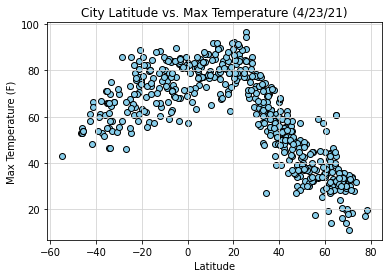

In [88]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig1.png")
plt.show()

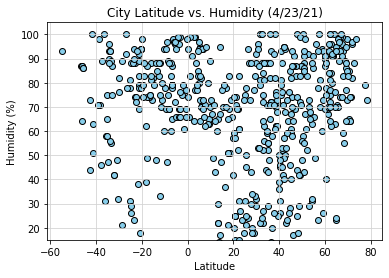

In [87]:
plt.scatter(weather_df["Lat"],weather_df["Humidity (%)"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig2.png")
plt.show()

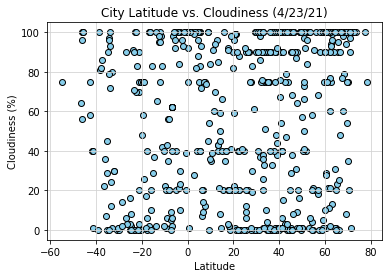

In [86]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (4/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()

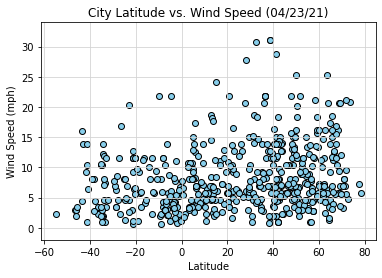

In [85]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (04/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()

In [98]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -0.92x + 92.48
The r-squared is: -0.8885845525342871
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


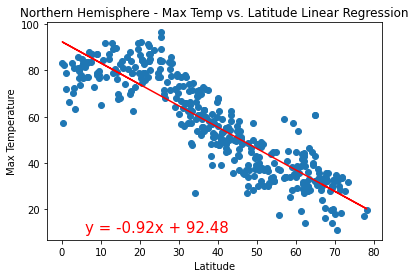

In [104]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.53x + 80.25
The r-squared is: 0.6214253461934588
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


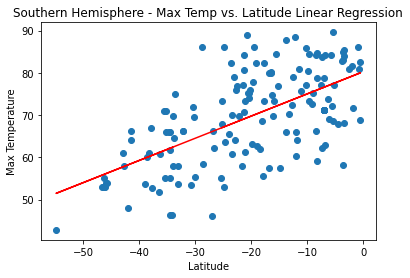

In [105]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

Regression line equation is: y = 0.26x + 55.73
The r-squared is: 0.21203727541816925
The regression does not display much of a correlation between the data sets.


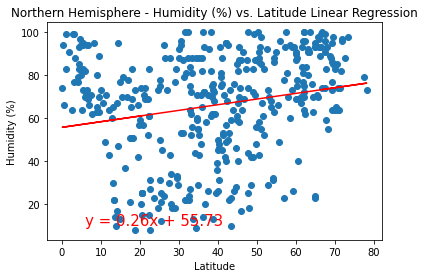

In [106]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.16x + 78.39
The r-squared is: 0.11213994742801285
The regression does not display much of a correlation between the data sets.


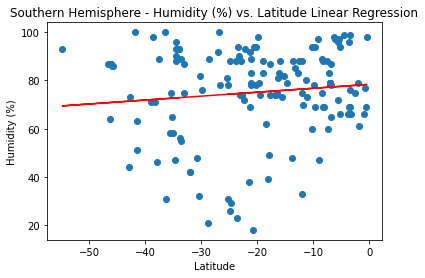

In [107]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.18x + 48.94
The r-squared is: 0.09054048624251816
The regression does not display much of a correlation between the data sets.


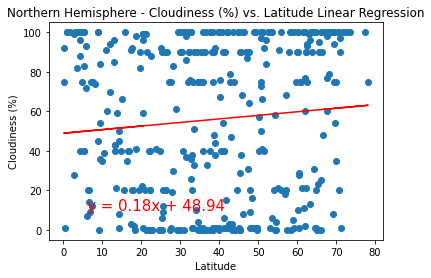

In [109]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.08x + 50.68
The r-squared is: 0.027969669183193123
The regression does not display much of a correlation between the data sets.


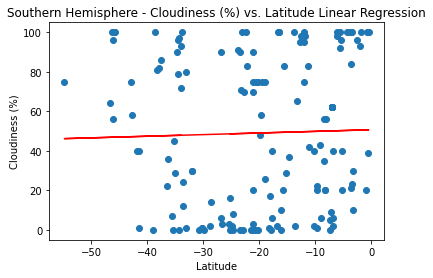

In [110]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.03x + 6.93
The r-squared is: 0.10285577991200015
The regression does not display much of a correlation between the data sets.


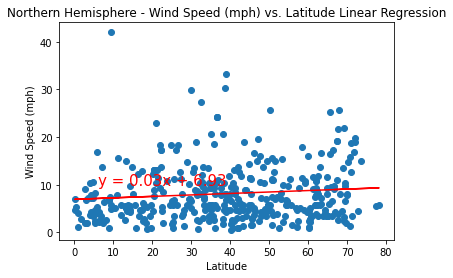

In [112]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.08x + 5.06
The r-squared is: -0.21675382243825547
The regression does not display much of a correlation between the data sets.


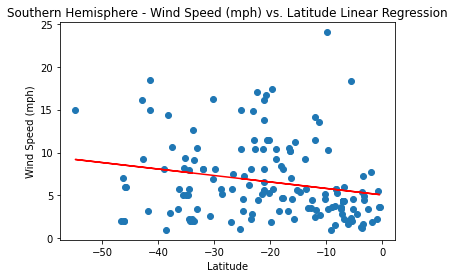

In [113]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()